In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

**Câu a:** Đọc và tiền xử lý dữ liệu

In [4]:
print("Huỳnh Thiên Huy - 6351071028")

with open('groceries.csv', 'r') as f:
    dataset = [line.strip().split(',') for line in f.readlines()]

print(f"Đã đọc {len(dataset)} giao dịch.")
print(f"Ví dụ giao dịch đầu tiên: {dataset[0]}")

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Kích thước dữ liệu sau khi One-hot: {df.shape}")

Huỳnh Thiên Huy - 6351071028
Đã đọc 9835 giao dịch.
Ví dụ giao dịch đầu tiên: ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
Kích thước dữ liệu sau khi One-hot: (9835, 169)


**Câu b:** Thực hiện so sánh hiệu năng

In [5]:
print("Huỳnh Thiên Huy - 6351071028")

min_sup_values = [0.01, 0.02, 0.03, 0.04, 0.05]

times_apriori = []
times_fpgrowth = []

print(f"{'Min_Sup':<10} | {'Apriori (s)':<15} | {'FP-Growth (s)':<15}")
print("-" * 45)

for min_sup in min_sup_values:
    start_time = time.time()
    apriori(df, min_support=min_sup, use_colnames=True)
    end_time = time.time()
    time_apriori = end_time - start_time
    times_apriori.append(time_apriori)

    start_time = time.time()
    fpgrowth(df, min_support=min_sup, use_colnames=True)
    end_time = time.time()
    time_fpgrowth = end_time - start_time
    times_fpgrowth.append(time_fpgrowth)

    print(f"{min_sup:<10} | {time_apriori:<15.4f} | {time_fpgrowth:<15.4f}")

Huỳnh Thiên Huy - 6351071028
Min_Sup    | Apriori (s)     | FP-Growth (s)  
---------------------------------------------
0.01       | 0.7768          | 13.3259        
0.02       | 0.0789          | 3.8708         
0.03       | 0.0427          | 0.6770         
0.04       | 0.0335          | 0.4808         
0.05       | 0.0322          | 0.1981         


**Câu c:** Vẽ biểu đồ so sánh

Huỳnh Thiên Huy - 6351071028


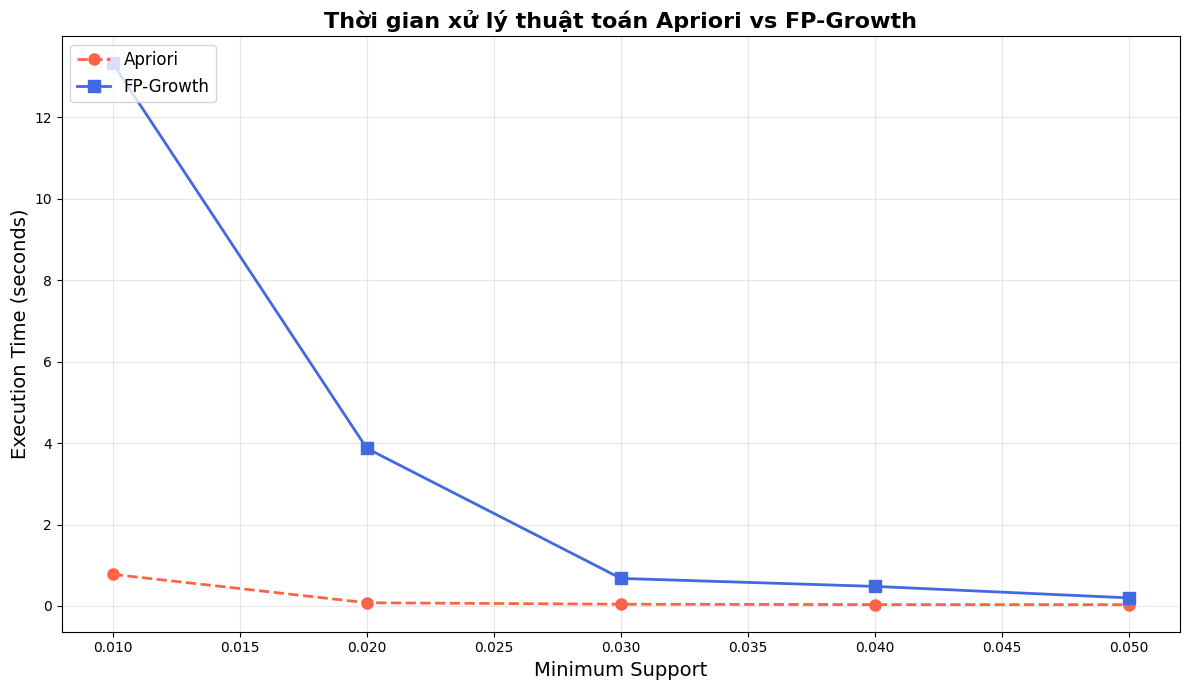

In [7]:
print("Huỳnh Thiên Huy - 6351071028")

plt.figure(figsize=(12, 7))

plt.plot(min_sup_values, times_apriori, 'o--', color='tomato', label='Apriori', markersize=8, linewidth=2)

plt.plot(min_sup_values, times_fpgrowth, 's-', color='royalblue', label='FP-Growth', markersize=8, linewidth=2)

plt.title('Thời gian xử lý thuật toán Apriori vs FP-Growth', fontsize=16, fontweight='bold')
plt.xlabel('Minimum Support', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)

plt.grid(alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()
